<h3 style="text-align: center;"><strong>ESCUELA DE INGENIERÍA INFORMÁTICA - UNIVERSIDAD DE SEVILLA</strong></h3>
<h3 style="text-align: center;"><strong>GRADO EN INGENIERÍA INFORMÁTICA-TECNOLOGÍAS INFORMÁTICAS</strong></h3>
<h1 style="font-size: 1em; text-align: center;"><strong>MATEMÁTICA DISCRETA<br /></strong></h1>
<h2 style="font-size: 1.17em; text-align: center;"><strong>Práctica 4. Árboles.<br /></strong></h2>
<p>Esta práctica la dividiremos en los siguiente apartados:</p>
<p> 1. <a href="#trasteando">Trasteando con árboles</a>.</p>
<p> 2. <a href="#dfs">El árbol DFS y los vértices de corte</a>.</p>
<p> 1. <a href="#bfs">El árbol BFS y su uso para resolver laberintos</a>.</p>
<p> 1. <a href="#ponderados">Árboles de peso y camino mínimo</a>.</p>
<p> </p>
<p>Al final de la práctica hay una  <a href="#cuestiones">colección de otros ejercicios propuestos.</a></p>
<p> </p>
<h2><a name="trasteando"></a><strong>1. Trasteando con árboles.</strong></h2>
<p>En esta primera parte trabajaremos con algunas propiedades básicas de los árboles.</p>
<p>Sage nos puede decir, con el método <em>G.is_tree</em>, si un grafo es o no un árbol.</p>

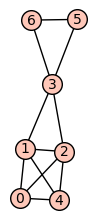

In [1]:
G=Graph({0:[1,2], 1:[0,3],2:[1,3,4],3:[5,6],4:[1,0],5:[6],6:[5]})
G.plot(figsize=3)

In [2]:
G.is_tree()

False

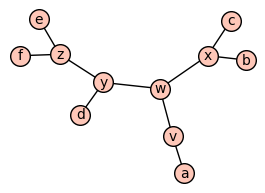

In [3]:
T = Graph ({"v" :[ "a" ,"w" ] , "w" :[ "x" ,"y" ] ,"x" :[ "b" ,"c" ] , "y" :[ "d" ,"z" ] ,"z" :[ "e" ,"f" ]})
T.plot(figsize=3)

In [4]:
T.is_tree()

True

<p>Este último es un árbol y lo podemos representar como árbol enraizado.</p>

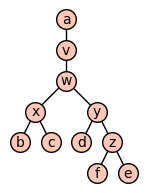

In [5]:
T.plot(figsize=3,layout='tree',tree_root='a')

<p>Recordemos que, según el teorema de caracterización, un árbol es un grafo que verifiqua alguna de las condiciones siguientes:</p>
<ul>
<li>Es conexo y no tiene ciclos.</li>
<li>Existe un único camino simple entre cualesquiera dos vértices.</li>
<li>Es conexo y al eliminar una cualquiera de sus aristas se obtiene un bosque de dos árboles.</li>
<li>Es conexo y tiene una arista menos que vértices.</li>
<li>Es acíclico (no tiene ciclos) y tiene una arista menos que vértices.</li>
</ul>
<p> </p>
<p>Comprobemos estas propiedades en el árbol $T$.</p>
<p>En primer lugar veremos que es conexo y no tiene ciclos, para esto último utilizamos el método <em>G.cycle_basis</em> que nos da una lista de ciclos del grafo.</p>

In [6]:
print("T es conexo? ",T.is_connected())
print("Ciclos del grafo",T.cycle_basis())

T es conexo?  True
Ciclos del grafo []


<p>Se puede comprobar que sólo existe un camino entre dos vértices cualesquiera, usando la orden <em>G.all_paths</em>, que nos muestra todos los caminos entre dos vértices. Lo vemos para una pareja de vértices.</p>

In [7]:
T.all_paths('a','d')

[['a', 'v', 'w', 'y', 'd']]

<p>Eliminamos una arista y comprobemos que resulta un grafo bosque (con el método <em>grafo.is_forest</em>) con dos árboles.</p>

In [8]:
H=copy(T)
H.delete_edge('w','y')
H.is_forest()

True

In [9]:
H.connected_components_number()

2

<p>Por último, vemos que tiene un vértice más que aristas. Para ello usamos los métodos <em>G.order</em>, que nos da el número de vértices, y <em>G.size,</em> que nos da el número de aristas.</p>

In [10]:
T.order()==T.size()+1

True

<p>Si tenemos un grafo G, conexo y con ciclos, podemos convertirlo en árbol eliminando aristas de los ciclos. Para ello jugamos con las funciones "<em>delete_edge</em>" y "<em>cycle_basis</em>".</p>

In [11]:
H=copy(G)
print(H.is_connected())
H.cycle_basis()

True


[[1, 4, 0], [2, 4, 0], [1, 2, 0], [1, 3, 2], [5, 6, 3]]

In [12]:
H.delete_edge(1,4)
print("H es árbol? ",H.is_tree())
H.cycle_basis()

H es árbol?  False


[[2, 4, 0], [1, 2, 0], [1, 3, 2], [5, 6, 3]]

In [13]:
H.delete_edge(2,4)
print("H es árbol? ",H.is_tree())
H.cycle_basis()

H es árbol?  False


[[1, 2, 0], [1, 3, 2], [5, 6, 3]]

In [14]:
H.delete_edge(1,2)
print("H es árbol? ",H.is_tree())
H.cycle_basis()

H es árbol?  False


[[1, 3, 2, 0], [5, 6, 3]]

In [15]:
H.delete_edge(1,3)
print("H es árbol? ",H.is_tree())
H.cycle_basis()

H es árbol?  False


[[5, 6, 3]]

In [16]:
H.delete_edge(5,6)
print("H es árbol? ",H.is_tree())
H.cycle_basis()

H es árbol?  True


[]

<p>Las instrucciones anteriores las podríamos meter en un ciclo, utilizando la orden "<strong>while</strong>".</p>

Eliminando aristas de G hemos obtenido el árbol H:


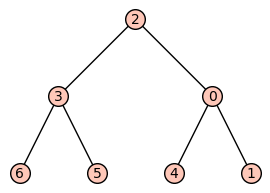

In [17]:
H=copy(G)
if H.is_connected():
    while not H.is_tree():
        ciclo=H.cycle_basis()[0]   #Almacenamos en la variable "ciclo" el primer ciclo de la lista
        H.delete_edge(ciclo[0],ciclo[1])   #Eliminamos la arista que une a los dos primeros vértices
    print("Eliminando aristas de G hemos obtenido el árbol H:")
    H.show(layout='tree',figsize=3)
else:
    print("Lo siento, el grafo no es conexo.")

<p>El grafo obtenido es un <strong>árbol recubridor</strong> del grafo $G$.</p>

<p><strong>EJERCICIO 1</strong>: El grafo siguiente no es un árbol. ¿Cuántas aristas habrá que suprimir para obtener un árbol recubridor del grafo?, ¿cuales son estas aristas?</p>

In [18]:
Gr = Graph({0:[1,2,3,6,8,14,17],1:[0,4],2:[0,10,14],3:[0,5,9,16],4:[1,11,13],5:[3,7],6:[0,7,13],7:[5,6,11],8:[0,11],9:[3,12,15],10:[2,15],11:[4,7,8,14],12:[9,14],13:[4,6],14:[0,2,11,12],15:[9,10],16:[3],17:[0]})

Eliminando 8 aristas de Gr hemos obtenido el árbol H1:


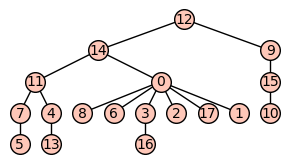

In [20]:
H1 = copy(Gr)
var = 0
if H1.is_connected():
    while not H1.is_tree():
        ciclo=H1.cycle_basis()[0]   #Almacenamos en la variable "ciclo" el primer ciclo de la lista
        H1.delete_edge(ciclo[0],ciclo[1])   #Eliminamos la arista que une a los dos primeros vértices
        var = var + 1
    print("Eliminando " + str(var) + " aristas de Gr hemos obtenido el árbol H1:")
    H1.show(layout='tree',figsize=3)
else:
    print("Lo siento, el grafo Gr no es conexo.")

<p>Las instrucciones anteriores las podríamos meter en un ciclo, utilizando la orden "<strong>while</strong>".  Incluso,  podemos definir la función de usuario "<strong>arbol_recubridor(grafo)</strong>" que recibe un grafo y nos devuelve un árbol recubridor de dicho grafo, como vemos a continuación:</p>

In [21]:
def arbol_recubridor(grafo):
    '''
    Recibe un grafo y si es conexo devuelve un árbol recubridor obtenido 
    eliminando aristas de ciclos. Si no es conexo devuelve un grafo vacío.
    '''
    var = 0
    if grafo.is_connected():
        while not grafo.is_tree():
            ciclo=grafo.cycle_basis()[0]  #Almacenamos en la variable "ciclo" el primer ciclo de la lista
            grafo.delete_edge(ciclo[0],ciclo[1])   #Eliminamos la arista que une a los dos primeros vértices
            var = var + 1
        print("Eliminando " + str(var) + " aristas del grafo de entraa hemos obtenido el árbol:")
        return grafo
    else:
        print("Lo siento, el grafo de entrada no es conexo.")
        return Graph()

<p>Aplicando esta función podemos obtener un árbol recubridor del grafo Gr:</p>

Eliminando 8 aristas del grafo de entraa hemos obtenido el árbol:


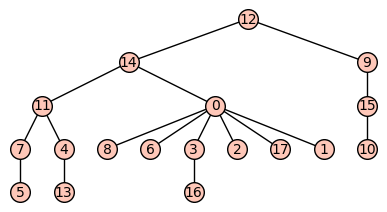

In [22]:
TGr=arbol_recubridor(Gr)
TGr.plot(figsize=4,layout='tree')

<p>Si el grafo que tenemos no es conexo, obteniendo el árbol recubridor de cada componente conexa, tendremos el <strong>bosque recubridor</strong> del grafo no conexo.</p>

<p>Recuerda que la instrucci&oacute;n <strong>G.connected_components_subgraphs()</strong> nos daba los grafos correspondientes a las componentes conexas de un grafo G, sea conexo o no. As&iacute; por ejemplo si el grafo G tiene 4 componente conexas, &eacute;stas se almacenan en los grafos G1, G2, G3 y G4 con la siguiente instruci&oacute;n:</p>
<p style="text-align: center;"><strong>[G1,G2,G3,G4]=G.connected_components_subgraphs()</strong></p>

<p><strong>EJERCICIO 2</strong>: Obtener el bosque recubridor del siguiente grafo:</p>

In [25]:
Gr = Graph({0:[13,10,11],1:[6,3,5],2:[8,4,14],3:[1,5,6],4:[12,9,2,15],5:[3,6,1],6:[1,5,3],7:[13,11],8:[9,2,12],9:[4,8,12],10:[13,11,0],11:[7,10,0],12:[4,8,14,9],13:[10,7,0],14:[15,12,2],15:[4,14]})

In [27]:
TGr = arbol_recubridor(Gr)

Lo siento, el grafo de entrada no es conexo.


In [ ]:
# TGr.plot(figsize=4,layout='tree')

<h2><a name="dfs"></a><strong>2. El árbol recubridor DFS y los vértices de corte.</strong></h2>
<p>Pretendemos en este apartado ver una aplicación del árbol recubridor de búsqueda en profundidad (DFS) al estudio de los vértices de corte de un grafo simple.</p>
<p>Con las siguientes instrucciones hemos definido la función "<strong>arbol_dfs(digrafo,vertice)</strong>"  que recibe un grafo dirigido y un vértice y nos devuelve el árbol recubridor de busqueda en profundidad (DFS) de "<em>digrafo</em>" con raíz en "<em>vertice</em>" y la lista ordenada de vértices según han sido visitados.</p>
<p>Para poder usarla con grafos simples hemos de convertirlo previamenta a digrafo, con la orden "<em>digrafo.to_directed()</em>".</p>

In [28]:
def arbol_dfs(digrafo,vertice=0):
    
    '''(T,l)=arbol_dfs(digrafo,vertice) devuelve el árbol dfs del "digrafo" con raíz en "vertice"
       y la lista ordenada de vértices visitados   '''

    if not digrafo.has_vertex(vertice):
        vertice=digrafo.vertices()[0]  
          
    #visitado=[False for i in range(digrafo.order())]
    visitado=[False for i in [0..digrafo.order()-1]]
    vertices_dfs=[]
    aristas_dfs=[]
    pila=[]
    
    vertices_dfs.append(vertice)
    pila.append(vertice)
    indice=digrafo.vertices().index(vertice)
    visitado[indice]=True
    while len(pila)>0:
        x=pila[-1]
        todos_ady=True
        for i in sorted(digrafo.neighbors_out(x)):
            indice=digrafo.vertices().index(i)
            if not visitado[indice]:
                todos_ady=False
                y=i
                break
        if not todos_ady:
            pila.append(y)
            indice=digrafo.vertices().index(y)
            visitado[indice]=True
            vertices_dfs.append(y)
            aristas_dfs.append((x,y))
        else:
            pila.remove(x)
    
    arboldfs=DiGraph()
    arboldfs.add_vertices(vertices_dfs)
    arboldfs.add_edges(aristas_dfs)  
    return (arboldfs,vertices_dfs)

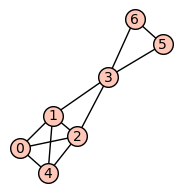

In [29]:
G=Graph({0:[1,2], 1:[0,3],2:[1,3,4],3:[5,6],4:[1,0],5:[6],6:[5]})
G.plot(figsize=3)

Orden de los vértices:  [3, 1, 0, 2, 4, 5, 6]


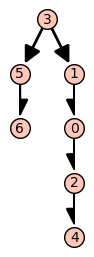

In [30]:
H=G.to_directed()
(T,lista)=arbol_dfs(H,3)
print("Orden de los vértices: ",lista)
T.plot(figsize=4,layout='tree')

<p>La siguiente propiedad relaciona el árbol DFS de un grafo con sus vértices de corte:</p>
<p style="text-align: left;"><em>Un vértice $v\in V(G)$ es vértice de corte en un grafo $G$ si, y sólo si, al realizar el árbol de búsqueda en profundidad con raíz en v, éste tiene en dicho árbol valencia mayor que 1.</em></p>

In [31]:
(T,lista)=arbol_dfs(H,0)
T.out_degree(0)

1

In [32]:
(T,lista)=arbol_dfs(H,3)
T.out_degree(3)

2

<p><strong>EJERCICIO 3</strong>:  Utilizando la propiedad anterior, obtener los vértices de corte del grafo siguiente, indicando qué valencia tiene cada uno de estos en el árbol DFS con raíz en él.</p>
<p>NOTA: Se trata de crear un ciclo, para todos los vértices, que calcule el árbol dfs correspondiente y verifique si el vértice tiene en el árbol valencia mayor que 1.</p>

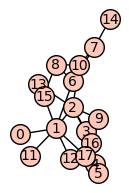

In [33]:
Gr= Graph({0:[1],1:[0,2,6,11,12,15,17],2:[1,3,9,10,13,16],3:[2,4,9],4:[3,5,16],5:[4,12,16,17],6:[1,7,8],7:[6,10,14],8:[6,10,15],9:[2,3,16],10:[2,7,8],11:[1],12:[1,5,16],13:[2],14:[7],15:[1,8],16:[2,4,5,9,12],17:[1,5]})
Gr.plot(figsize=3)

In [36]:
DGr = Gr.to_directed()
for i in Gr.blocks_and_cut_vertices()[1]:
    (DFS, lista) = arbol_dfs(DGr, i)
    print("Vertice de corte " + str(i) + " con valencia de salida: " + str(DFS.out_degree(i)))

Vertice de corte 1 con valencia de salida: 3
Vertice de corte 2 con valencia de salida: 2
Vertice de corte 7 con valencia de salida: 2


<h2><a name="bfs"></a><strong>3. Usando el árbol BFS para resolver laberintos.<br /></strong></h2>
<p>La siguiente función "<strong>arbol_bfs(digrafo,vertice)</strong>"  recibe un grafo dirigido y un vértice y nos devuelve el árbol recubridor de busqueda en anchura (BFS) de "<em>digrafo</em>" con raíz en "<em>vertice</em>" y la lista ordenada de vértices según han sido visitados.</p>
<p>Para poder usarla con grafos simples hemos de convertirlo previamenta a digrafo, con la orden "<em>digrafo.to_directed()</em>".</p>

In [37]:
def arbol_bfs(digrafo,vertice):
    '''
    (T,l)=arbol_bfs(digrafo,vertice) devuelve el árbol BFS del "digrafo" con raíz 
    en "vertice" y la lista ordenada de vértices visitados.   
    Si quisieras obtener el bfs de un grafo simple G, antes habrás de convertirlo 
    en digrafo con la orden G.to_directed()
    '''
       
    #visitado=[False for i in range(digrafo.order())]
    visitado=[False for i in [0..digrafo.order()-1]]
    vertices_bfs=[]
    aristas_bfs=[]
    cola=[]
    
    vertices_bfs.append(vertice)
    cola.append(vertice)
    indice=digrafo.vertices().index(vertice)
    visitado[indice]=True
    while len(cola)>0:
        x=cola[0]
        for i in sorted(digrafo.neighbors_out(x)):
            indice=digrafo.vertices().index(i)
            if not visitado[indice]:
                cola.append(i)
                visitado[indice]=True
                vertices_bfs.append(i)
                aristas_bfs.append((x,i))
        cola.remove(x)
    
    arbolbfs=DiGraph()
    arbolbfs.add_vertices(vertices_bfs)
    arbolbfs.add_edges(aristas_bfs)  
    return (arbolbfs,vertices_bfs)

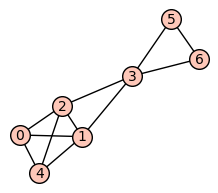

In [38]:
G=Graph({0:[1,2], 1:[0,3],2:[1,3,4],3:[5,6],4:[1,0],5:[6],6:[5]})
G.plot(figsize=3)

Orden de los vértices:  [1, 0, 2, 3, 4, 5, 6]


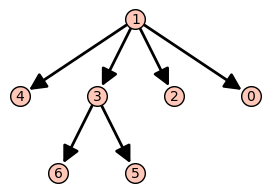

In [39]:
H=G.to_directed()
(T,lista)=arbol_bfs(H,1)
print("Orden de los vértices: ",lista)
T.plot(figsize=3,layout='tree')

In [40]:
G.to_dictionary()

{0: [1, 2, 4],
 1: [0, 2, 3, 4],
 2: [0, 1, 3, 4],
 3: [1, 2, 5, 6],
 4: [0, 1, 2],
 5: [3, 6],
 6: [3, 5]}

Orden de los vértices:  [1, 0, 2, 3, 5, 6, 4]


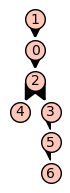

In [41]:
H=G.to_directed()
(T,lista)=arbol_dfs(H,1)
print("Orden de los vértices: ",lista)
T.plot(figsize=3,layout='tree')

<p>Sabemos que el árbol BFS de un grafo (o digrafo) no ponderado, con raíz en un vértice "v" nos permite obtener el camino más corto (con el menor número de aristas) desde el vértice "v" a cualquiera de los otros, siendo por tanto la distancia desde el vértice "v" a cualquier otro vértice del grafo el número de aristas de dicho camino.</p>
<p>Veamos cómo podemos utilizar esta propiedad para obtener la solución más rápida a juegos de laberintos como el consistente en desplazar la pelota roja hasta situarla sobre el cuadro azul.</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="Laberinto1.jpg" alt="" width="191" height="193" /></p>
<p> Estos laberintos aparecen en la página web <a href="http://www.clickmazes.com/newtilt/ixtilt2d.htm" target="_blank">clickmazes.com</a>.</p>
<p>Para ello nuestro tablero va a representar un grafo dirigido, donde cada vértice será una posición "(i,j)" del tablero y cada arista indica un movimiento posible.</p>
<p> </p>
<p>Habida cuenta de que los movimientos quedan perfectamente definidos por los obstáculos horizontales y verticales que existen en el interior del tablero, vamos a generar el digrafo de una forma más cómoda, introduciendo en dos listas dichos obstáculos. Estas listas son "<strong>obs_derecha</strong>" y "<strong>obs_abajo</strong>". Si una celda (i,j) está en la lista "obs_derecha" indica que en esa celda hay un obstáculo en su pared derecha y si (i,j) está en la lista "obs_abajo" indica que hay un obstáculo en el suelo de dicha celda.</p>
<p>Las siguientes líneas definen estas listas para el laberinto de la figura (el primero de los laberintos de la página).</p>

In [42]:
##Datos correspondientes al primer laberinto 
n=5  ##Número de filas del tablero
m=5  ##Número de columnas del tablero
obs_derecha=[(0,2),(2,0),(4,2)]
obs_abajo=[(0,1),(1,4),(2,2),(3,1),(3,4)]

<p>La siguiente función, "<strong>digrafo_laberinto(nf,nc,obstver,obsthor)</strong>", devuelve el digrafo de los movimientos en un laberinto $nf \times nc$ que tiene los obstáculos en la derecha de las celdas dadas por la lista <em>obstver</em> y en el suelo de las celdas dadas por la lista <em>obsthor</em>.</p>

In [43]:
def digrafo_laberinto(nf,nc,obstver,obsthor):
    ''' 
    Genera el digrafo correspondiente al movimiento en un laberinto del tipo "www.clickmazes.com"
    INPUT:
    - nf = Número de filas del laberinto
    - nc = Número de columnas del laberinto
    - obstver = lista de casillas que tienen un obstáculo en su pared derecha
    - obsthor = lista de casillas que tienen un obstáculo en su suelo
    OUTPUT:
    - Grafo dirigido que simula el movimiento de la pelota en el laberinto.
    '''
    ###Generamos el grafo
    DGlaberinto=DiGraph()
    ##Los vértices son las casillas del tablero
    #for i in range(nf):
    for i in [0..nf-1]:
        #for j in range(nc):
        for j in [0..nc-1]:
            DGlaberinto.add_vertex((i,j))
    ##Creamos las aristas
    #for i in range(nf):
    for i in [0..nf-1]:
        #for j in range(nc):
        for j in [0..nc-1]:
            ##aristas hacia la derecha
            seguir=True
            i0=i;j0=j
            if ((i0,j0) in obstver) or (j0==nc-1): seguir=False
            while seguir:
                j0+=1
                if ((i0,j0) in obstver) or (j0==nc-1): seguir=False
            if j!=j0: DGlaberinto.add_edge((i,j),(i0,j0),'Der')
        
            ##aristas hacia abajo_abajo
            seguir=True
            i0=i;j0=j
            if ((i0,j0) in obsthor) or (i0==nf-1): seguir=False
            while seguir:
                i0+=1
                if ((i0,j0) in obsthor) or (i0==nf-1): seguir=False
            if i!=i0: DGlaberinto.add_edge((i,j),(i0,j0),'Abj')
                
            ##aristas hacia la izquierda
            seguir=True
            i0=i;j0=j
            if ((i0,j0-1) in obstver) or (j0==0): seguir=False
            while seguir:
                j0-=1
                if ((i0,j0-1) in obstver) or (j0==0): seguir=False
            if j!=j0: DGlaberinto.add_edge((i,j),(i0,j0),'Izq')
                    
            ##aristas hacia arriba
            seguir=True
            i0=i;j0=j
            if ((i0-1,j0) in obsthor) or (i0==0): seguir=False
            while seguir:
                i0-=1
                if ((i0-1,j0) in obsthor) or (i0==0): seguir=False
            if i!=i0: DGlaberinto.add_edge((i,j),(i0,j0),'Arr')
    
    return DGlaberinto

<p>A continuación generamos el digrafo G que "modeliza" nuestro laberinto.</p>

In [44]:
G=digrafo_laberinto(n,m,obs_derecha,obs_abajo)

<p>Obtenemos el árbol de búsqueda en anchura, con raíz en el vértice de inicio (en este caso el (0,0)), que nos dará la menor distancia desde este vértice a todos los demás.</p>

In [45]:
(T,l)=arbol_bfs(G,(0,0))

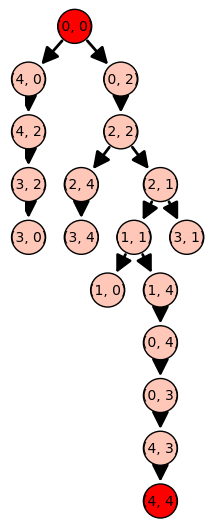

In [46]:
T.plot(layout='tree',figsize=8,vertex_size=600,vertex_colors={'red':[(0,0),(4,4)]})

<p>Vemos entonces que la solución más rápida del problema es seguir el camino más corto entre los vértices Inicio y Destino, que es de 9 aristas (movimientos):</p>
<p>(0,0)--(0,2)--(2,2)--(2--1)--(1,1)--(1,4)--(0,4)--(0,3)--(4,3)--(4,4)</p>
<p>Por lo tanto hemos de pulsar las teclas   Der--Aba--Izq--Arr--Der--Arr--Izq--Aba--Der</p>

<p><strong>EJERCICIO 4</strong>: Encontrar la solución (óptima) del laberinto</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="Laberinto2.jpg" alt="" width="201" height="200" /></p>

In [50]:
##Datos correspondientes al laberinto 
n=6  ##Número de filas del tablero
m=6  ##Número de columnas del tablero
obs_derecha=[(0,0),(0,4),(2,0),(2,1),(2,2),(3,2),(3,3),(5,1),(5,2)]
obs_abajo=[(0,2),(1,4),(2,2),(2,3),(2,5),(3,0),(4,5)]

In [51]:
# Crea el laberinto:
G=digrafo_laberinto(n,m,obs_derecha,obs_abajo)

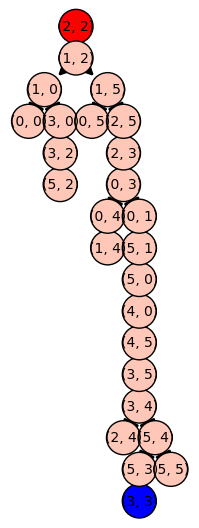

In [52]:
# Punto de inicio:
(T,l)=arbol_bfs(G,(2,2))
# Resultado:
T.plot(layout='tree', figsize=8, vertex_size=600,vertex_colors={'red':[(2,2)], 'blue':[(3,3)]})

<h2><a name="ponderados"></a><strong>4. Árboles de peso y camino mínimo.</strong></h2>
<p>En esta apartado estudiaremos algunos problemas relativos a árboles generadores en grafos ponderados.</p>
<p>Para definir un grafo (o digrafo) ponderado en Sage, en la orden <em>Graph</em> (o <em>DiGraph</em>) hemos de señalar el parámetro <em>weighted=True.</em> A partir  de este momento, las etiquetas de las aristas son consideradas como su peso.</p>
<p>A continuación definimos un grafo ponderado</p>

In [53]:
Gp=Graph(weighted=True)
aristas=[('A','C',36),('B','I',12),('B','J',34),('C','E',45),('C','G',48),('D','G',18),('D','H',36),('E','J',30), ('F','H',40),('G','J',38),('H','J',43)]
Gp.add_edges(aristas)

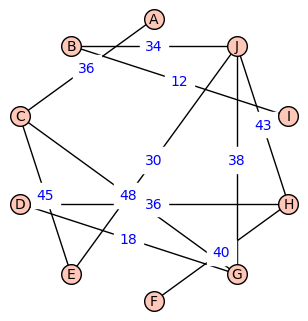

In [54]:
Gp.plot(figsize=5,edge_labels=True,layout='circular')

<h3>4.1 Árbol recubridor de peso mínimo (Kruskal)</h3>
<p>La función de usuario "<strong>Kruskal(G)</strong>" devuelve un árbol recubridor de peso mínimo del grafo $G$ y el peso de dicho árbol.</p>

In [55]:
def Kruskal(grafo):
    
    '''
    Obtiene un árbol recubridor de peso mínimo de un grafo.
    
    SINTAXIS:  (T,p) = Kruskal(grafo)
    
    INPUT:
        - grafo -- Un grafo, ponderado a no. Si no es ponderado considera las aristas de peso 1.
        
    OUTPUT:
        - T -- árbol de peso mínimo
        - p -- peso total del árbol
    
    '''  
    
    if not grafo.is_connected():
        #Si el grafo no es conexo lo advierte.
        print("Lo siento. El grafo no es conexo.")
        return (Graph(),0)
    else:
        if not grafo.weighted():
            #Si el grafo no es ponderado lo convierte a ponderado
            #con las aristas de peso=1
            grafo.weighted(True)
            for a in grafo.edges():
                grafo.set_edge_label(a[0],a[1],1)
    
        funcion_peso = lambda e: grafo.edge_label(e[0],e[1])
        aristas=grafo.min_spanning_tree(weight_function=funcion_peso)
        recubridor=Graph()
        recubridor.weighted(True)
        recubridor.add_edges(aristas)
        
        #Colocamos el peso de las aristas del árbol recubridor
        for a in recubridor.edges():
            recubridor.set_edge_label(a[0],a[1],grafo.edge_label(a[0],a[1]))
    
        #Sumamos el peso del árbol
        peso=0
        for b in recubridor.edges():
            peso+=recubridor.edge_label(b[0],b[1])
    
        return (recubridor,peso)

<p>Para usarla hemos de hacerlo con la siguiente sintáxis:  <em>(arbol,peso)=Kruskal(G)</em>:</p>

In [56]:
(arbol,peso)=Kruskal(Gp)

El peso del árbol es  289


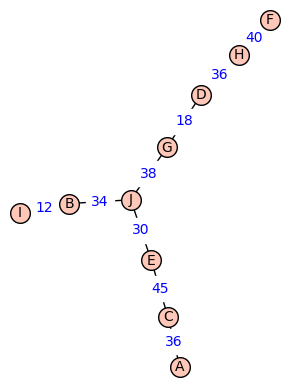

In [57]:
print("El peso del árbol es ", peso)
arbol.plot(figsize=6,edge_labels=True)

<h3>4.2 Camino mínimo (Djkstra)</h3>
<p>En este apartado veremos cómo calcular el camino mínimo desde un vértice a todos los demás. El grafo (árbol) que contiene aquellos caminos mínimos desde un vértice fijo se llama <strong>árbol de camino mínimo</strong>. Para ello aplicamos el algoritmo de Djkstra.</p>
<p>Si el grafo es un grafo simple, la longitud de un camino es el número de aristas. Entonces, si consideramos el grafo como ponderado con todas las aristas de igual peso (por ejemplo $1$), el árbol de camino mínimo coincide con el árbol de búsqueda en anchura (BFS).</p>
<p>A continuación se define la función <strong>Djkstra(grafo,vértice)</strong> que recibe un grafo (ponderado o no) y un vértice y devuelve una lista con las distancias desde el vértice fijo a todos los demás y el árbol de camino mínimo, con raíz en dicho vértice.</p>

In [58]:
def Djkstra(G,s):
    '''
    Caminos mas cortos en un grafo desde uno de sus vértices, usando el algoritmo de Djkstra.
    Si el grafo no es ponderado, se convierte a ponderado con peso 1 en las aristas.
    
    SINTAXIS:  (D,T) = Djkstra(G,s)
    
    INPUT:
    - G -- un grafo no dirigido (ponderado o no)
    - s -- un vértice de G desde el que se calculan las distancias
    
    OUTPUT:
    - D -- Una lista D de distancias, de forma que D[v] es la distancia más corta de s a v.
    - T -- árbol de camino mínimo desde s
    '''
    
    #Si G no es ponderado poner peso 1 a las aristas
    if not G.weighted():
        G.weighted(True)
        for a in G.edges():
            G.set_edge_label(a[0],a[1],1)
    
    #Controlar si G es conexo
    if not G.is_connected():
        print("El grafo no es conexo.")
        print("Se obtendrá el árbol de camino mínimo de la componente conexa del vértice ",s)
    
    cc=G.connected_component_containing_vertex(s)
    vtodos=G.vertices()
  
    
    n=G.order()
    #Padres=[[] for _ in range(n)] #Inicializar padres de los vértices
    Padres=[[] for _ in [0..n-1]] #Inicializar padres de los vértices
    #D=[1000000000 for _ in range(n)] #Etiquetas igual a "infinito"
    D=[1000000000 for _ in [0..n-1]] #Etiquetas igual a "infinito"

    inds=vtodos.index(s)
    D[inds]=0
    Q=set(cc)
    while len(Q)>0:
        #Buscamos el vértice de Q con menor etiqueta
        v=None
        low=1000000000
        for u in Q:
            indu=vtodos.index(u)
            if D[indu]<low:
                v=u
                low=D[indu]
        #Actualizamos etiquetas
        indv=vtodos.index(v)
        Q.remove(v)
        Adj=set(G.neighbors(v))
        for u in Adj.intersection(Q):
            larista=G.edge_label(v,u)
            indu=vtodos.index(u)
            if D[indu]>D[indv]+larista:
                D[indu]=D[indv]+larista
                Padres[indu]=[v]
    P={}  #Dicionario con los padres de cada vértice
    for u in cc:
        indu=vtodos.index(u)
        P.setdefault(u,Padres[indu])             
    T=Graph(P) #Árbol de camino mínimo
    T.weighted(True)
    for a in T.edges():
        T.set_edge_label(a[0],a[1],G.edge_label(a[0],a[1]))
    
    return D,T

<p>Esta función se usa con la siguiente sintáxis <em>(D,T)=Djkstra(grafo,v)</em>.</p>

In [59]:
(D,T)=Djkstra(Gp,'A')

In [60]:
print("las distancias a cada vértice son ")
print(D)

las distancias a cada vértice son 
[0, 145, 36, 102, 81, 178, 84, 138, 157, 111]


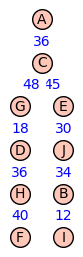

In [61]:
T.plot(figsize=4,layout='tree',tree_root='A',edge_labels=True)

<p><strong>EJERCICIO 5</strong>: La siguiente tabla muestra las longitudes en metros de las tuberías de agua entre distintos puntos de un barrio de la ciudad (la central distribuidora del agua se encuentra en el punto $A$).</p>
<table style="margin-left: auto; margin-right: auto; border-width: 0px; width: 315px; height: 196px; border-style: solid;" border="2">
<tbody>
<tr>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">A</td>
<td align="center" valign="middle">B</td>
<td align="center" valign="middle">C</td>
<td align="center" valign="middle">D</td>
<td align="center" valign="middle">E</td>
<td align="center" valign="middle">F</td>
<td align="center" valign="middle">G</td>
<td align="center" valign="middle">H</td>
</tr>
<tr>
<td align="center" valign="middle">A</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">21</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">60</td>
<td align="center" valign="middle">20</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
</tr>
<tr>
<td align="center" valign="middle">B</td>
<td align="center" valign="middle">21</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">22</td>
<td align="center" valign="middle">30</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">19</td>
</tr>
<tr>
<td align="center" valign="middle">C</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">22</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">40</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">41</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">28</td>
</tr>
<tr>
<td align="center" valign="middle">D</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">30</td>
<td align="center" valign="middle">40</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">28</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">11</td>
</tr>
<tr>
<td align="center" valign="middle">E</td>
<td align="center" valign="middle">60</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">28</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">21</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">26</td>
</tr>
<tr>
<td align="center" valign="middle">F</td>
<td align="center" valign="middle">20</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">41</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">21</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">25</td>
<td align="center" valign="middle">23</td>
</tr>
<tr>
<td align="center" valign="middle">G</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">25</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">25</td>
</tr>
<tr>
<td align="center" valign="middle">H</td>
<td align="center" valign="middle"> </td>
<td align="center" valign="middle">19</td>
<td align="center" valign="middle">28</td>
<td align="center" valign="middle">11</td>
<td align="center" valign="middle">26</td>
<td align="center" valign="middle">23</td>
<td align="center" valign="middle">25</td>
<td align="center" valign="middle"> </td>
</tr>
</tbody>
</table>
<p style="text-align: left;">a) La empresa suministradora de agua pretende conocer cuál debe ser la presión necesaria para llevar el agua a todos los puntos del barrio, y por ello necesita saber cuál es la mayor de todas las distancias desde la central (punto $A$) a los distintos puntos del barrio. ¿Cuál es esta distancia y cuál es el recorrido que sigue el agua hasta llegar a ese punto más alejado?<br /><br />b)  La corrosión ha atacado a las tuberías, dejándolas inservibles. ¿Cuáles son los tramos que hay que reconstruir para que se pueda llevar el agua a todos los puntos del barrio con el mínimo coste y por tanto con la menor cantidad de metros de tubería?,¿cu\ántos metros serán  necesarios reconstruir?</p>
<p style="text-align: left;">NOTA: A continuación se define el grafo correspondiente.</p>

In [62]:
Gr=Graph(weighted=True)
aristas=[('A','B',21),('A','E',60),('A','F',20),('B','C',22),('B','D',30),('B','H',19),('C','D',40),('C','F',41),('C','H',28),('D','E',28),('D','H',11),('E','F',21),('E','H',26),('F','G',25),('F','H',23),('G','H',25)]
Gr.add_edges(aristas)

Mayor distancia: 51
Recorrido :



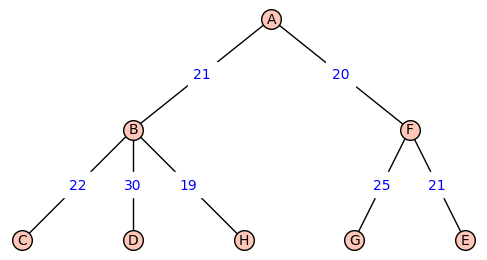

In [64]:
# Pto. inicio = A
# a)
(D, T) = Djkstra(Gr, 'A')
print("Mayor distancia: " + str(max(D)))
print("Recorrido :\n")
T.plot(figsize=5, layout='tree', edge_labels=True)

In [67]:
# b)
(T, p) = Kruskal(Gr)
print("Metros de tubería: " + str(p))
print("Tramos a reconstruir: \n")
T.edges()
# T.plot(figsize=5, layout='tree', edge_labels=True)

Metros de tubería: 139
Tramos a reconstruir: 



[('A', 'B', 21), ('A', 'F', 20), ('B', 'C', 22), ('B', 'H', 19), ('D', 'H', 11), ('E', 'F', 21), ('F', 'G', 25)]

<h1><a name="cuestiones"></a><strong>Otros ejercicios propuestos</strong></h1>
<p><strong>EJERCICIO 6</strong>: Obtener el bosque recubridor del siguiente grafo.</p>
<p>NOTAS:</p>
<p>1) Se puede utilizar la funcion de usuario "<em>arbol_recubridor(grafo)</em>" definida anteriormente.</p>
<p>2) Recuérdese que el método <em>G.connected_components_subgraphs</em> nos devuelve una lista de los subgrafos componentes conexas de $G$.</p>

In [68]:
Gr = Graph({0:[5,9,16],1:[4,3],2:[5,7],3:[8,10,14,4,1],4:[1,3,8,18],5:[0,2,13],6:[12],7:[2,12,15,16,19],8:[3,14,4,18],9:[0,16,17,19],10:[14,3],11:[15],12:[6,7,13],13:[5,12],14:[8,10,3,18],15:[7,11,17,19],16:[0,7,9],17:[9,15],18:[8,14,4],19:[7,9,15]})

In [73]:
Gr.connected_components()
# Obtenemos dos componentes, luego:
C1, C2 = Gr.connected_components_subgraphs()

Eliminando 6 aristas del grafo de entraa hemos obtenido el árbol:


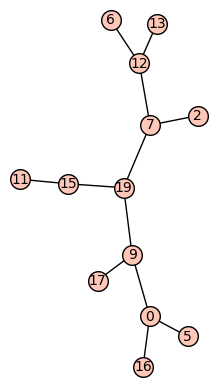

In [74]:
H1 = arbol_recubridor(C1)
plot(H1)

Eliminando 6 aristas del grafo de entraa hemos obtenido el árbol:


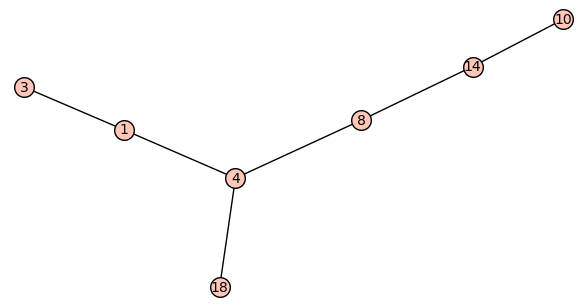

In [75]:
H2= arbol_recubridor(C2)
plot(H2)

<p><strong>EJERCICIO 7</strong>:Resolver el laberinto</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="Laberinto3.jpg" alt="" width="201" height="199" /></p>

<p><strong>EJERCICIO 8</strong>: Resolver el laberinto</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="Laberinto4.jpg" alt="" width="204" height="204" /></p>

<p><strong>EJERCICIO 9</strong>: Resolver el laberinto</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="Laberinto5.jpg" alt="" width="202" height="202" /></p>

<p><strong>EJERCICIO 10</strong>: El grafo siguiente modeliza en una ciudad las longitudes que separan entre sí paradas de autobús accesibles entre sí sin paradas intermedias por alguna línea. Se pide:</p>
<p>a) Asumiendo que en cada tramo la circulación es en doble sentido, determinar un esquema que utilice el menor número de tramos posible y que permita ir desde la parada $A$ a cualquier otra parada. Justificar si tal esquema es o no único.</p>
<p>b) De entre todos los posibles esquemas del apartado anterior, determinar uno cuya longitud total (suma de las longitudes de sus tramos) sea mínima. ¿Cuál es su longitud total?</p>
<p>c) Determinar ahora un esquema que refleje las rutas más cortas desde $A$ a las restantes paradas. ¿Cuál es la ruta más corta a la parada $E$?</p>

In [ ]:
Gp=Graph(weighted=True)
aristas=[('A', 'B', 265), ('A', 'F', 138), ('A', 'K', 82), ('A', 'L', 124), ('A', 'O', 144), ('A', 'Q', 248), ('A', 'R', 107),
('A', 'S', 157), ('A', 'V', 92), ('B', 'F', 159), ('B', 'G', 116), ('B','I', 174), ('B', 'J', 130), ('B', 'K', 263), ('B', 'L', 56), ('B', 'S',130), ('B', 'U', 194), ('B', 'V', 189), ('C', 'D', 256), ('C', 'J',239), ('C', 'K', 140), ('C', 'O', 264), ('C', 'T', 204), ('C', 'V',
206), ('C', 'W', 77), ('D', 'L', 127), ('D', 'N', 75), ('D', 'V', 144),('E', 'G', 138), ('E', 'L', 284), ('E', 'O', 122), ('E', 'Q', 106),
('E', 'R', 233), ('F', 'G', 144), ('F', 'I', 126), ('F', 'Q', 284),('F', 'V', 137), ('G', 'I', 258), ('G', 'K', 216), ('G', 'O', 111),
('G', 'S', 193), ('G', 'V', 233), ('H', 'K', 158), ('H', 'M', 63), ('H','P', 227), ('H', 'U', 80), ('I', 'M', 182), ('I', 'P', 262), ('I', 'Q',59), ('I', 'R', 91), ('I', 'S', 199), ('J', 'O', 112), ('J', 'P', 192),('J', 'R', 88), ('K', 'M', 79), ('K', 'O', 167), ('K', 'V', 164), ('L','M', 143), ('L', 'N', 214), ('L', 'R', 272), ('L', 'S', 203), ('L', 'W',191), ('M', 'N', 79), ('M', 'Q', 129), ('M', 'R', 279), ('M', 'T', 252),('N', 'T', 129), ('N', 'U', 193), ('O', 'R', 165), ('P', 'Q', 298),('P', 'S', 278), ('Q', 'T', 233), ('R', 'U', 277), ('S', 'T', 52), ('S','W', 171), ('T', 'U', 279), ('T', 'W', 208), ('U', 'V', 207), ('U', 'W',67)]
Gp.add_edges(aristas)